In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.3.5
2.6.3


In [4]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [24]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [25]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
CategoricalParameter('A.1_Brate', [0, 1, 2])
CategoricalParameter('A.2_Brate', [0, 1, 2])
CategoricalParameter('A.3_Brate', [0, 1, 2])
CategoricalParameter('A.4_Brate', [0, 1, 2])
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [26]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

In [27]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'), function=<function sum_over at 0x0000013A4527A280>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'), function=<function sum_over at 0x0000013A4527A280>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'), function=<function sum_over at 0x0000013A4527A280>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'), function=<function sum_over at 0

In [28]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=1)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments

  0%|                                                  | 0/100 [00:00<?, ?it/s][MainProcess/INFO] performing experiments sequentially

100%|████████████████████████████████████████| 100/100 [00:58<00:00,  1.71it/s]
[MainProcess/INFO] experiments finished


In [21]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['All Costs', 'A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,30,51.182195,10,0.880205,114.466543,1.0,0.963008,91.590350,10,0.660589,...,3,8,10,4,4,8,4,312,311,dikesnet
1,119,325.051519,1.5,0.011178,338.043757,1.5,0.231940,106.973883,1.5,0.306335,...,3,8,10,4,4,8,4,313,311,dikesnet
2,42,348.458235,10,0.007668,241.306296,10,0.528610,177.578288,1.5,0.633479,...,3,8,10,4,4,8,4,314,311,dikesnet
3,114,256.515640,1.0,0.361133,138.379257,1.0,0.207098,132.027478,1.5,0.251227,...,3,8,10,4,4,8,4,315,311,dikesnet
4,50,284.298986,1.5,0.427305,344.932522,1.5,0.488535,169.694394,1.0,0.578878,...,3,8,10,4,4,8,4,316,311,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,66,344.031065,10,0.863298,91.307110,10,0.724422,282.302163,1.0,0.238986,...,3,8,10,4,4,8,4,407,311,dikesnet
96,1,318.776256,10,0.401147,133.488712,1.0,0.044669,286.630029,1.0,0.437239,...,3,8,10,4,4,8,4,408,311,dikesnet
97,0,287.454549,1.5,0.631536,123.734245,1.5,0.829192,349.662538,10,0.555948,...,3,8,10,4,4,8,4,409,311,dikesnet
98,103,138.729231,1.0,0.205753,249.846531,1.0,0.190724,230.703468,10,0.569765,...,3,8,10,4,4,8,4,410,311,dikesnet


In [22]:
print(outcomes['All Costs'][0])

1479760699.3431017


[MainProcess/INFO] no time dimension found in results


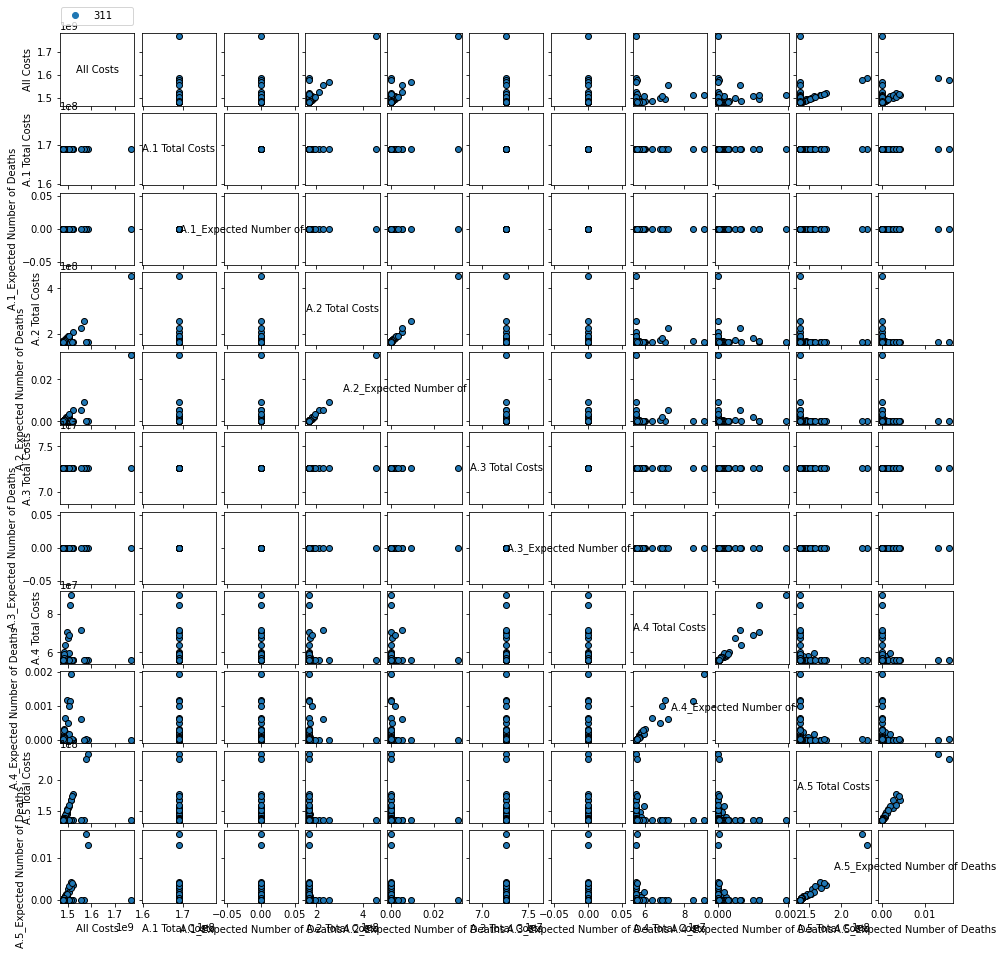

In [23]:
from ema_workbench.analysis import prim, pairs_plotting

#Draw a figure of the different policies
experiments, outcomes = results
fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, group_by="policy", palette = 'colorblind', legend=True
    #experiments, outcomes, legend=True
)
fig.set_size_inches(16, 16)
plt.show()

In [10]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

In [11]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [01:04<00:00,  4.65it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
